In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils
from keras.layers import Dense,Activation,Flatten,Convolution2D,Dropout,MaxPooling2D
from keras.models import Sequential


Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [4]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


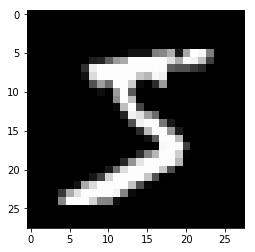

In [6]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

print(Y_train.shape,Y_test.shape)

(60000, 10) (10000, 10)


In [ ]:
X_train = X_train[:3600]
Y_train = Y_train[:3600]

X_test = X_test[:900]
Y_test = Y_test[:900]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_train.shape)

(3600, 28, 28, 1) (3600, 10)
(900, 28, 28, 1) (3600, 10)


In [ ]:
model = Sequential()

model.add(Convolution2D(32,3,3,input_shape=(28,28,1)))
model.add(Activation('relu'))
#(26,26,32)

model.add(Convolution2D(64,3,3))
model.add(Activation('relu'))
#(24,24,64)

model.add(MaxPooling2D(pool_size=(2,2)))
#(12,12,64)

model.add(Convolution2D(16,3,3))
model.add(Activation('relu'))
#(10,10,16)

model.add(Flatten())
#(1600)

model.add(Dropout(0.25))

model.add(Dense(10)) #number of classes = 10
model.add(Activation('softmax'))

model.summary()

W0703 11:02:43.601217 4630341056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
W0703 11:02:43.665608 4630341056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 11:02:43.679324 4630341056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/anaconda3/lib/python3.7/site-packages/ipykern

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 16)        0         
__________

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W0703 11:02:44.048425 4630341056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0703 11:02:44.133520 4630341056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [ ]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),nb_epoch=12,batch_size=16,verbose=2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0703 11:02:44.464005 4630341056 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3600 samples, validate on 900 samples
Epoch 1/12
 - 12s - loss: 3.1085 - acc: 0.6372 - val_loss: 0.2845 - val_acc: 0.9044
Epoch 2/12
 - 13s - loss: 0.2730 - acc: 0.9144 - val_loss: 0.2677 - val_acc: 0.9144
Epoch 3/12
 - 10s - loss: 0.1531 - acc: 0.9550 - val_loss: 0.1349 - val_acc: 0.9556
Epoch 4/12
 - 12s - loss: 0.1003 - acc: 0.9681 - val_loss: 0.1393 - val_acc: 0.9556
Epoch 5/12
 - 10s - loss: 0.0900 - acc: 0.9706 - val_loss: 0.1361 - val_acc: 0.9544
Epoch 6/12
 - 10s - loss: 0.0764 - acc: 0.9775 - val_loss: 0.1749 - val_acc: 0.9511
Epoch 7/12
 - 10s - loss: 0.0707 - acc: 0.9786 - val_loss: 0.1688 - val_acc: 0.9444
Epoch 8/12
 - 10s - loss: 0.0644 - acc: 0.9794 - val_loss: 0.1164 - val_acc: 0.9544
Epoch 9/12


In [ ]:
import cv2

In [ ]:
im = cv2.imread('/users/yajashkadian/data/l.png')
img = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
print(img.shape)

plt.imshow(img,cmap='gray')
plt.show()

In [ ]:

print(img.shape)
plt.show()

In [ ]:
import scipy.misc

In [ ]:
img = scipy.misc.imresize(img,(28,28))

In [ ]:
model.predict_classes(img.reshape(1,28,28,1))

In [ ]:
model.predict_proba(img.reshape(1,28,28,1))